<a href="https://colab.research.google.com/github/enriquejujuy/IPDI/blob/main/IPDI_TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CONVOLUCION**
**CHOQUE Enrique A.**

In [74]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-75-82289221526d>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('/content/imagen/lena512.png')


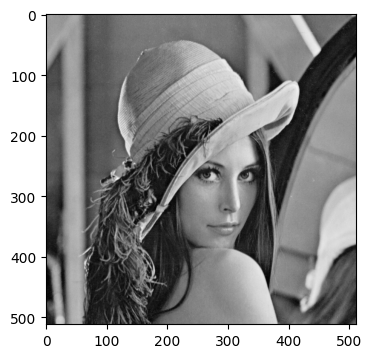

(512, 512)


In [75]:
# prompt: cargar la imagen y procesarla en escala de grises

import imageio
import numpy as np
import matplotlib.pyplot as plt

img = imageio.imread('/content/imagen/lena512.png')

# Convertir la imagen a escala de grises
img_gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

# Normalizar la imagen
img_gray = img_gray / 255.0

plt.figure(figsize=(4, 6))
plt.imshow(img_gray, cmap='gray')
plt.show()

print(img_gray.shape)


Kernel de Bartlett de 3 x 3 normalizada

In [76]:

kernel_bartlett = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

# Normalizar el kernel
kernel_bartlett = kernel_bartlett / np.sum(kernel_bartlett)

print("Kernel de Bartlett 3x3:")
print(kernel_bartlett)


Kernel de Bartlett 3x3:
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


Kernel de Bartlett de 5 x 5 normalizada

In [77]:
def kernel_5x5():
  """Crea una matriz de Bartlett de 5x5."""
  kernel = np.array([[1, 2, 3, 2, 1],
                    [2, 4, 6, 4, 2],
                    [3, 6, 9, 6, 3],
                    [2, 4, 6, 4, 2],
                    [1, 2, 3, 2, 1]])
  return kernel / kernel.sum()  # Normalizar para que la suma de los elementos sea 1

# Crear y mostrar el kernel de Bartlett
kernel_5x5 = kernel_5x5()
print("Kernel de Bartlett 5x5:")
print(kernel_5x5)

Kernel de Bartlett 5x5:
[[0.01234568 0.02469136 0.03703704 0.02469136 0.01234568]
 [0.02469136 0.04938272 0.07407407 0.04938272 0.02469136]
 [0.03703704 0.07407407 0.11111111 0.07407407 0.03703704]
 [0.02469136 0.04938272 0.07407407 0.04938272 0.02469136]
 [0.01234568 0.02469136 0.03703704 0.02469136 0.01234568]]


Kernel de Bartlett de 7 x 7 normalizada

In [78]:
# prompt: defini una funcion que cre una matriz de bartlett de 7*7 y mostrarla

def kernel_7x7():
  """Crea una matriz de Bartlett de 7x7."""
  kernel = np.array([[1, 2, 3, 4, 3, 2, 1],
                    [2, 4, 6, 8, 6, 4, 2],
                    [3, 6, 9, 12, 9, 6, 3],
                    [4, 8, 12, 16, 12, 8, 4],
                    [3, 6, 9, 12, 9, 6, 3],
                    [2, 4, 6, 8, 6, 4, 2],
                    [1, 2, 3, 4, 3, 2, 1]])
  return kernel / kernel.sum()  # Normalizar para que la suma de los elementos sea 1

# Crear y mostrar el kernel de Bartlett
kernel_7x7 = kernel_7x7()
print("Kernel de Bartlett 7x7:")
print(kernel_7x7)


Kernel de Bartlett 7x7:
[[0.00390625 0.0078125  0.01171875 0.015625   0.01171875 0.0078125
  0.00390625]
 [0.0078125  0.015625   0.0234375  0.03125    0.0234375  0.015625
  0.0078125 ]
 [0.01171875 0.0234375  0.03515625 0.046875   0.03515625 0.0234375
  0.01171875]
 [0.015625   0.03125    0.046875   0.0625     0.046875   0.03125
  0.015625  ]
 [0.01171875 0.0234375  0.03515625 0.046875   0.03515625 0.0234375
  0.01171875]
 [0.0078125  0.015625   0.0234375  0.03125    0.0234375  0.015625
  0.0078125 ]
 [0.00390625 0.0078125  0.01171875 0.015625   0.01171875 0.0078125
  0.00390625]]


CONVOLUCION de imagen con kernel de 3 x 3

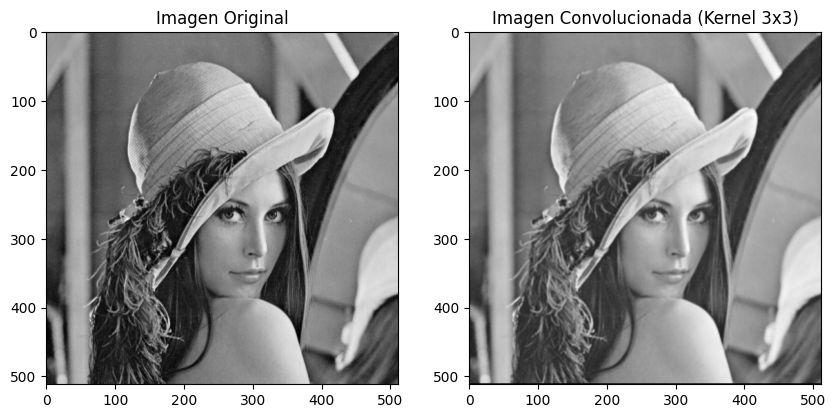

In [79]:
# prompt: realizar convolucion de la imagen con el kernel de 3x3 y mostral la original y con convolucion

def convolucion(imagen, kernel):
  """Realiza la convolución de una imagen con un kernel."""
  filas_imagen, columnas_imagen = imagen.shape
  filas_kernel, columnas_kernel = kernel.shape
  imagen_convolucionada = np.zeros_like(imagen)

  for i in range(filas_kernel // 2, filas_imagen - filas_kernel // 2):
      for j in range(columnas_kernel // 2, columnas_imagen - columnas_kernel // 2):
          # Extraer la sección de la imagen que se va a convolucionar
          seccion_imagen = imagen[i - filas_kernel // 2:i + filas_kernel // 2 + 1,
                                j - columnas_kernel // 2:j + columnas_kernel // 2 + 1]
          # Calcular la convolución
          imagen_convolucionada[i, j] = np.sum(seccion_imagen * kernel)

  return imagen_convolucionada


# Realizar la convolución con el kernel de 3x3
img_convolucionada = convolucion(img_gray, kernel_bartlett)


# Mostrar la imagen original y la imagen convolucionada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen Original")

plt.subplot(1, 2, 2)
plt.imshow(img_convolucionada, cmap='gray')
plt.title("Imagen Convolucionada (Kernel 3x3)")

plt.show()


CONVOLUCION de imagen con kernel de 5 x 5

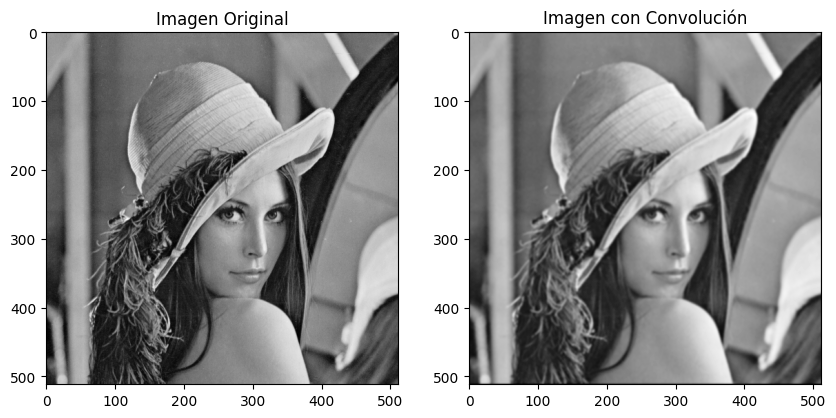

In [80]:
# prompt: realizar convolucion de la imagen con el kernel y mostral la original y con convolucion

import scipy.signal

def convolucion(img, kernel):
  """Realiza la convolución de una imagen con un kernel."""
  img_conv = scipy.signal.convolve2d(img, kernel, mode='same', boundary='fill', fillvalue=0)
  return img_conv


# Realizar la convolución
img_conv = convolucion(img_gray, kernel_5x5)

# Mostrar la imagen original y la imagen con convolución
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen Original")

plt.subplot(1, 2, 2)
plt.imshow(img_conv, cmap='gray')
plt.title("Imagen con Convolución")

plt.show()


CONVOLUCION de imagen con kernel de 7 x 7

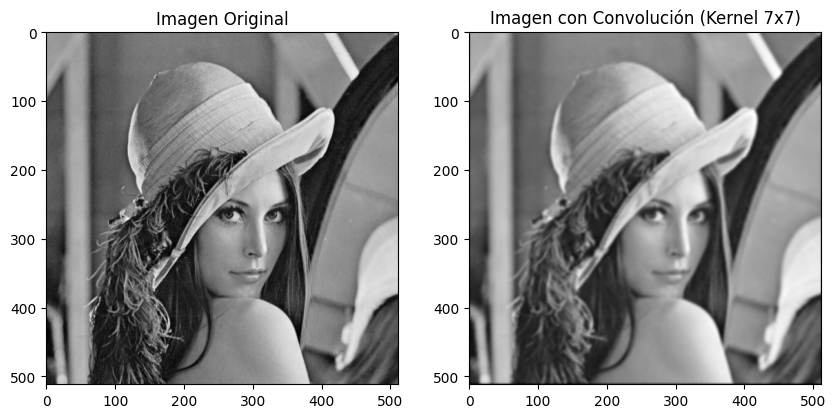

In [82]:
# prompt: realizar convolucion de la imagen con el kernel  de 7 x7 y mostrar la original y con convolucion

# Realizar la convolución
img_conv = convolucion(img_gray, kernel_7x7)

# Mostrar la imagen original y la imagen con convolución
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen Original")

plt.subplot(1, 2, 2)
plt.imshow(img_conv, cmap='gray')
plt.title("Imagen con Convolución (Kernel 7x7)")

plt.show()


KERNEL Gaussiano de 5 x 5

In [83]:
# prompt: crear un kernel gaussiano de 5 x 5 y normalizar

import numpy as np

def gaussian_kernel(size, sigma=1):
  """Crea un kernel gaussiano."""
  ax = np.linspace(-(size // 2), size // 2, size)
  gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
  kernel = np.outer(gauss, gauss)
  return kernel / np.sum(kernel)  # Normalizar el kernel

# Crear el kernel gaussiano de 5x5 con sigma=1
kernel_gaussian_5x5 = gaussian_kernel(5, sigma=1)

print("Kernel Gaussiano 5x5:")
print(kernel_gaussian_5x5)


Kernel Gaussiano 5x5:
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


KERNEL Gaussiano de 7 x 7

In [84]:
# prompt: crear un kernel gaussiano de 7 x 7

# Crear el kernel gaussiano de 7x7 con sigma=1
kernel_gaussian_7x7 = gaussian_kernel(7, sigma=1)

print("Kernel Gaussiano 7x7:")
print(kernel_gaussian_7x7)


Kernel Gaussiano 7x7:
[[1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [1.76900911e-03 2.15509428e-02 9.65846250e-02 1.59241126e-01
  9.65846250e-02 2.15509428e-02 1.76900911e-03]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]]


CONVOLUCION con Kernel Gaussiano de 5 x 5

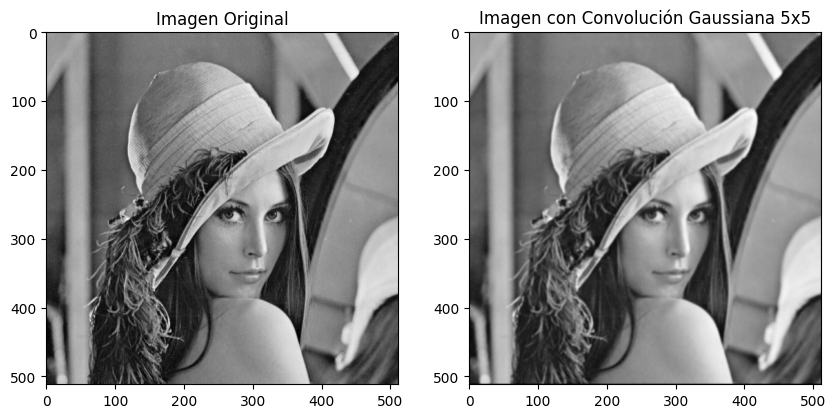

In [85]:
# prompt: convolucion de imagen con el kernel gaussiano de 5x5

# Realizar la convolución con el kernel gaussiano de 5x5
img_conv_gaussian_5x5 = convolucion(img_gray, kernel_gaussian_5x5)

# Mostrar la imagen original y la imagen con convolución gaussiana de 5x5
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen Original")

plt.subplot(1, 2, 2)
plt.imshow(img_conv_gaussian_5x5, cmap='gray')
plt.title("Imagen con Convolución Gaussiana 5x5")

plt.show()


Convolucion  con kernel Gaussiano de 7 x 7

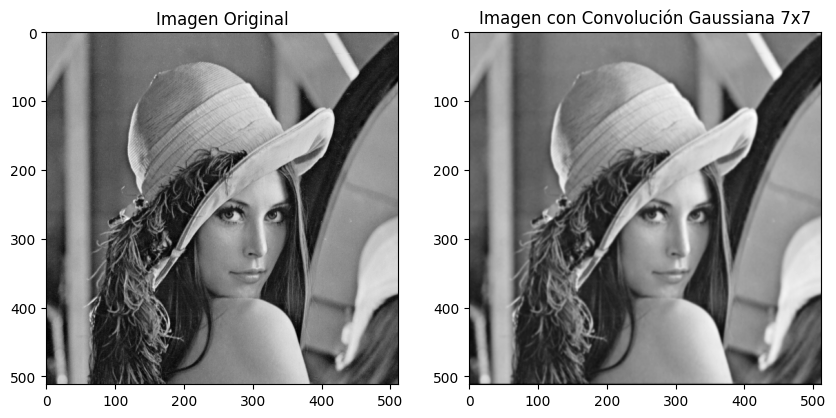

In [86]:
# prompt: convolucion de imagen con el kernel gaussiano de 7x7

# Realizar la convolución con el kernel gaussiano de 7x7
img_conv_gaussian_7x7 = convolucion(img_gray, kernel_gaussian_7x7)

# Mostrar la imagen original y la imagen con convolución gaussiana de 7x7
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen Original")

plt.subplot(1, 2, 2)
plt.imshow(img_conv_gaussian_7x7, cmap='gray')
plt.title("Imagen con Convolución Gaussiana 7x7")

plt.show()


### **DETECTORES DE BORDES**

Laplaciano v4

Kernel de Laplaciano v4:
[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


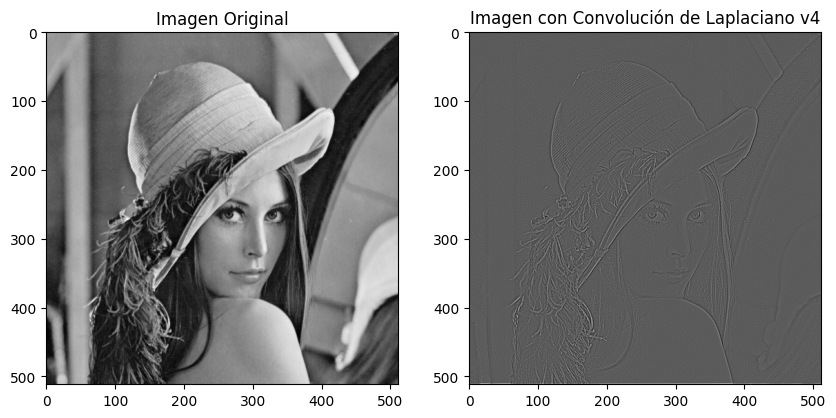

In [87]:
# prompt: kernel de bordes de Laplaciano v4

kernel_laplaciano_v4 = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

print("Kernel de Laplaciano v4:")
print(kernel_laplaciano_v4)

# Realizar la convolución con el kernel de Laplaciano v4
img_conv_laplaciano_v4 = convolucion(img_gray, kernel_laplaciano_v4)

# Mostrar la imagen original y la imagen con convolución de Laplaciano v4
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen Original")

plt.subplot(1, 2, 2)
plt.imshow(img_conv_laplaciano_v4, cmap='gray')
plt.title("Imagen con Convolución de Laplaciano v4")

plt.show()


Detector de bordes de Laplaciano v8

Kernel de Laplaciano v8:
[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]


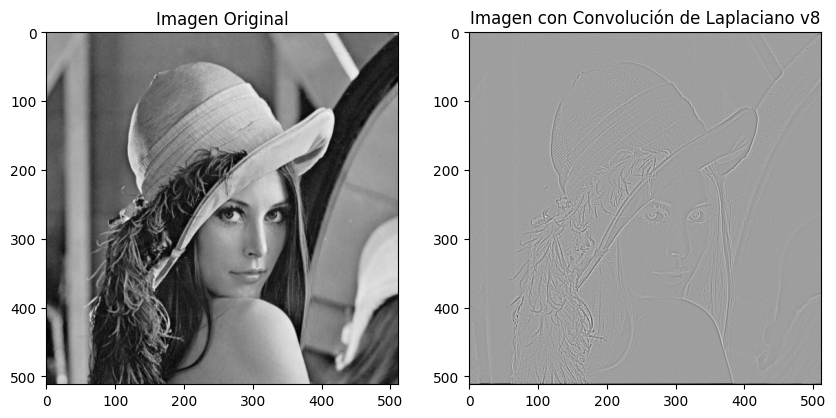

In [88]:
# prompt: kernel de bordes de Laplaciano v8

# Kernel de Laplaciano v8
kernel_laplaciano_v8 = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
])

print("Kernel de Laplaciano v8:")
print(kernel_laplaciano_v8)

# Realizar la convolución con el kernel de Laplaciano v8
img_conv_laplaciano_v8 = convolucion(img_gray, kernel_laplaciano_v8)

# Mostrar la imagen original y la imagen con convolución de Laplaciano v8
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen Original")

plt.subplot(1, 2, 2)
plt.imshow(img_conv_laplaciano_v8, cmap='gray')
plt.title("Imagen con Convolución de Laplaciano v8")

plt.show()


Kernel de Laplaciano v8:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


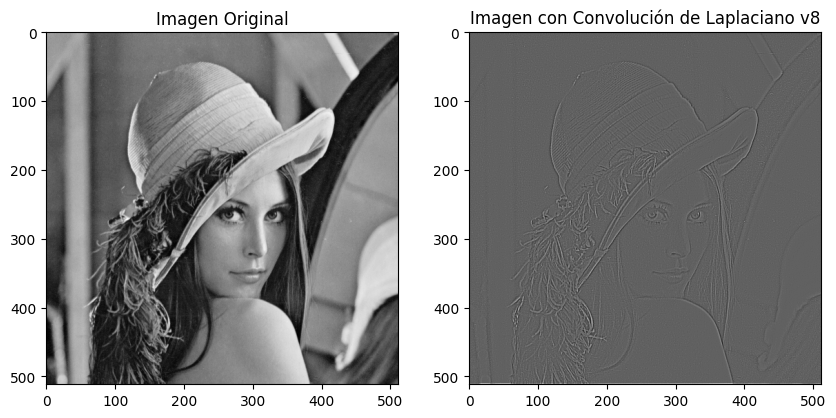

In [89]:
# prompt: kernel de bordes de Laplaciano v8

# Kernel de Laplaciano v8
kernel_laplaciano_v8 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

print("Kernel de Laplaciano v8:")
print(kernel_laplaciano_v8)

# Realizar la convolución con el kernel de Laplaciano v8
img_conv_laplaciano_v8 = convolucion(img_gray, kernel_laplaciano_v8)

# Mostrar la imagen original y la imagen con convolución de Laplaciano v8
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen Original")

plt.subplot(1, 2, 2)
plt.imshow(img_conv_laplaciano_v8, cmap='gray')
plt.title("Imagen con Convolución de Laplaciano v8")

plt.show()

# **SOBEL**

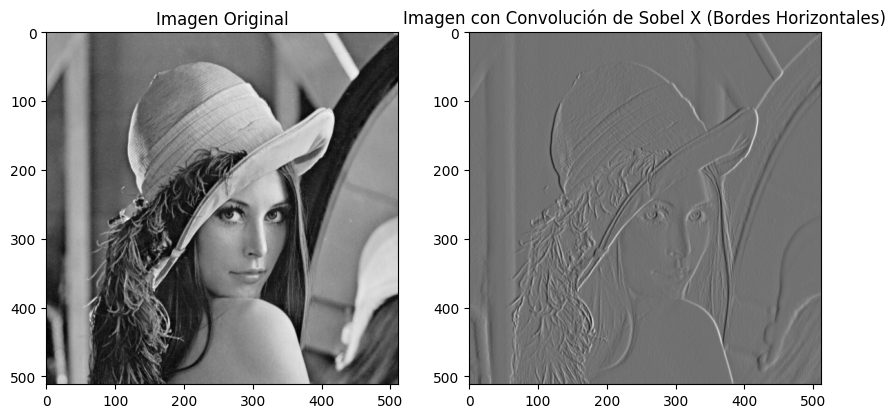

In [90]:
# prompt: crear borde en la direccion derecha, izquierda de sobel

# Kernel de Sobel para detectar bordes horizontales (derecha e izquierda)
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Realizar la convolución con el kernel de Sobel para bordes horizontales
img_conv_sobel_x = convolucion(img_gray, sobel_x)

# Mostrar la imagen original y la imagen con convolución de Sobel para bordes horizontales
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen Original")

plt.subplot(1, 2, 2)
plt.imshow(img_conv_sobel_x, cmap='gray')
plt.title("Imagen con Convolución de Sobel X (Bordes Horizontales)")

plt.show()


[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


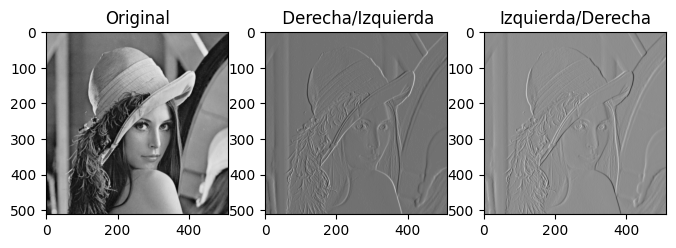

Kernel Arriba Abajo:
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
Kernel  Abajo Arriba:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


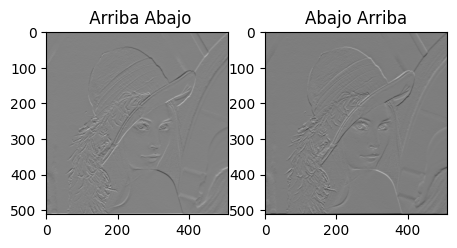

In [91]:
# Kernel de Sobel para detectar bordes en la dirección horizontal (derecha/izquierda)
sobel_x1 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]])
print(sobel_x1)
# Kernel de Sobel para detectar bordes en la dirección horizontal (izquierda/derecha)
sobel_x2 = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])

print(sobel_x2)
# Realizar la convolución con el kernel de Sobel X1, X2
img_conv_sobel_x1 = convolucion(img_gray, sobel_x1)
img_conv_sobel_x2 = convolucion(img_gray, sobel_x2)

# Mostrar la imagen original y la imagen con convolución de Sobel X
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(img_conv_sobel_x1, cmap='gray')
plt.title(" Derecha/Izquierda")

plt.subplot(1, 3, 3)
plt.imshow(img_conv_sobel_x2, cmap='gray')
plt.title("Izquierda/Derecha")

plt.show()

# Kernel de Sobel para detectar bordes en la dirección vertical (arriba/abajo)
sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]])
# Kernel de Sobel para detectar bordes en la dirección vertical (abajo/arriba)
sobel_y1 = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]])
# Realizar la convolución con el kernel de Sobel Y, Y1
img_conv_sobel_y = convolucion(img_gray, sobel_y)
img_conv_sobel_y1 = convolucion(img_gray, sobel_y1)
print("Kernel Arriba Abajo:")
print(sobel_y)
print("Kernel  Abajo Arriba:")
print(sobel_y1)

plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 2)
plt.imshow(img_conv_sobel_y, cmap='gray')
plt.title(" Arriba Abajo")

plt.subplot(1, 3, 3)
plt.imshow(img_conv_sobel_y1, cmap='gray')
plt.title("Abajo Arriba")

plt.show()


BORDES Superior Derecha y Superior Izquierda

Kernel Superior-Derecha:
[[-2 -1  0]
 [-1  0  1]
 [ 0  1  2]]
Kernel Superior-Izquierda:
[[ 0 -1 -2]
 [ 1  0 -1]
 [ 2  1  0]]


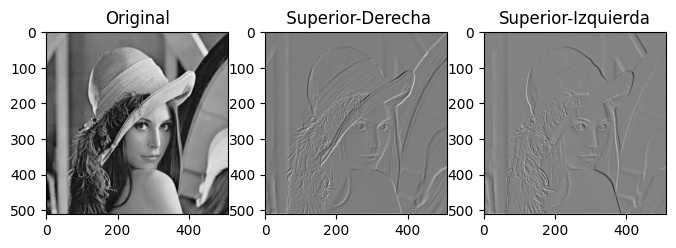

In [92]:
# Kernel de Sobel para detectar bordes en la dirección Superior-derecha
sobel_sd = np.array([
    [-2, -1, 0],
    [-1, 0, 1],
    [0, 1, 2]])
print("Kernel Superior-Derecha:")
print(sobel_sd)

# Kernel de Sobel para detectar bordes en la dirección Superior-Izquierda
sobel_si = np.array([
    [0, -1, -2],
    [1, 0, -1],
    [2, 1, 0]])
print("Kernel Superior-Izquierda:")
print(sobel_si)
# Realizar la convolución con el kernel de Sobel X1, X2
img_conv_sobel_sd = convolucion(img_gray, sobel_sd)
img_conv_sobel_si = convolucion(img_gray, sobel_si)

# Mostrar la imagen original y la imagen con convolución de Sobel X
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(img_conv_sobel_sd, cmap='gray')
plt.title(" Superior-Derecha")

plt.subplot(1, 3, 3)
plt.imshow(img_conv_sobel_si, cmap='gray')
plt.title("Superior-Izquierda")

plt.show()


Bordes Inferior-Derecha e Inferior-Izquierda

Kernel Inferior-Derecha:
[[ 2  1  0]
 [ 1  0 -1]
 [ 0 -1 -2]]
Kernel Inferior-Izquierda:
[[ 0  1  2]
 [-1  0  1]
 [-2 -1  0]]


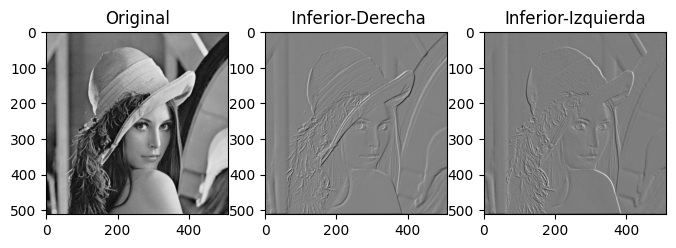

In [95]:
# Kernel de Sobel para detectar bordes en la dirección Inferior-derecha
sobel_id = np.array([
    [2, 1, 0],
    [1, 0, -1],
    [0, -1, -2]])
print("Kernel Inferior-Derecha:")
print(sobel_id)

# Kernel de Sobel para detectar bordes en la dirección Inferior-Izquierda
sobel_ii = np.array([
    [0, 1, 2],
    [-1, 0, 1],
    [-2, -1, 0]])

print("Kernel Inferior-Izquierda:")
print(sobel_ii)
# Realizar la convolución con el kernel de Sobel ID, II
img_conv_sobel_id = convolucion(img_gray, sobel_id)
img_conv_sobel_ii = convolucion(img_gray, sobel_ii)

# Mostrar la imagen original y la imagen con convolución
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(img_conv_sobel_id, cmap='gray')
plt.title(" Inferior-Derecha")

plt.subplot(1, 3, 3)
plt.imshow(img_conv_sobel_ii, cmap='gray')
plt.title("Inferior-Izquierda")

plt.show()

**PASABANDA**